# Visualizing Decision Trees

## The Raw Tree Itself

Sklearn has a built in way of visualizing the decision tree making process.

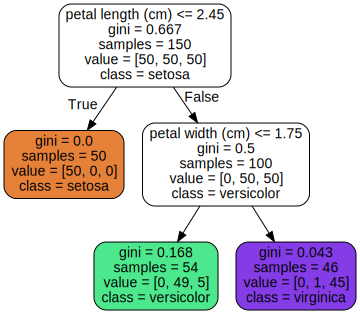

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import os


iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

tmp_file_name = 'iris_dt_vis.dot'
export_graphviz(
    tree_clf,
    out_file=tmp_file_name,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source.from_file(tmp_file_name)

In [3]:
tmp_file_name = os.path.join('.', tmp_file_name)
if os.path.isfile(tmp_file_name):
    os.remove(tmp_file_name)

* The visualization is structured as followed (in order):
    * Split feature and criteria: the chosen feature to split on and value of which to base it on.
    * Gini: metric that measure the information loss or "impurity", which measure how much of one class falls into the wrong camp.
    * Samples: the number of samples as the result of splitting by the parent.
    * Value: The number of training instances that apply to each class.
    * Class: The most frequent class as the result of splitting on the criteria.

## The Decision Boundaries

This visualization only works in settings where there are only 2-3 features. But I'm going to include the visualization here because it demonstrations the binary partitioning strategy of the CART implemention.

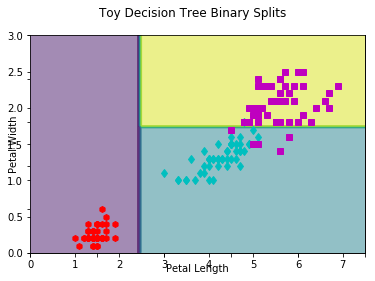

In [4]:
%matplotlib inline
from mltoolbox.draw.classification import plot_2d_decision_boundary

plot_2d_decision_boundary([tree_clf], X, y, (0, 7.5), (0, 3), 100, 100, n_classes=3, 
                          contour=True, xlabel='Petal Length', ylabel='Petal Width', suptitle='Toy Decision Tree Binary Splits')

As we can see from the decision tree above, there are two splits here, both of which fall under the petal width feature. For every split, we form an axis parallel frontier, partitioning the data as a result into two groups.

## Regression "Lines"

Text(0.5, 1.0, 'max_depth=3')

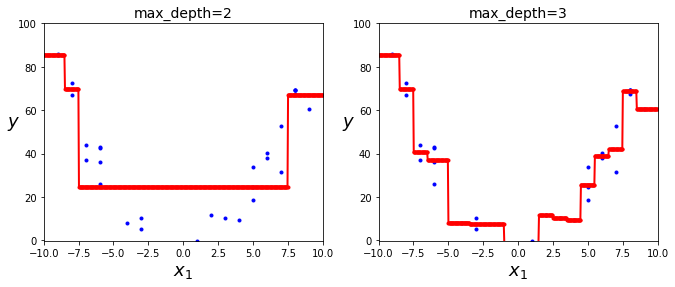

In [19]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from mltoolbox.data.random import noisy_func

X, y = noisy_func(lambda x: x**2, np.arange(-10, 10), 30, 7)
X = X.reshape(-1, 1)

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[-10, 10, -0.2, 100]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
plt.title("max_depth=3", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y)
plt.title("max_depth=10", fontsize=14)